# Research Notebook

## 1. Make an input file
* In the same directory as this Jupyter notebook, there must be a template input file (the default name is qpinput_template.json) and two python files: mkQPinput.py and pyVisQP.py

* For the 'Units', if 'Normalized' is selected, then all the length will be in the normalized units, and the last box will be $n_{peak}/n_p$. If 'Experimental' is selected, then all the length will have the unit of $\mu m$, and the last box will be the total charge of the beam (in $nC$).

In [1]:
from importlib import reload
import mkQPinput
mkQPinput = reload(mkQPinput)
mkQPinput.makeWidgetsForInput()

interactive(children=(Text(value='qpinput_template.json', description='Template Input File:', layout=Layout(wi…

## 2. Run QuickPIC simulation

In [2]:
# Open a terminal and run the following lines (or something like that. For a large simulatoin, submit a batch script):
# salloc -N 1 -C haswell -q interactive -t 01:00:00
# srun -n 32 -c 2 --cpu_bind=cores qpic.initialDump.e

32


256

## 3. Visualize the output data
### 1. Plasma and beam density

In [2]:
ndump = 20

In [3]:
from importlib import reload
import pyVisQP

pyVisQP = reload(pyVisQP)

dirname = '..'

# Plot the charge density of plasma and beam
filename1 = dirname +'/Species0001/Charge_slice_0001/charge_slice_xz_'+str(ndump).zfill(8)+'.h5'
filename2 = dirname +'/Beam0001/Charge_slice_0001/charge_slice_xz_'+str(ndump).zfill(8)+'.h5'
filenameList = [filename1,filename2]
scaleList = [1,1]
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = None)

filename1 = dirname +'/Species0001/Charge_slice_0002/charge_slice_yz_'+str(ndump).zfill(8)+'.h5'
filename2 = dirname +'/Beam0001/Charge_slice_0002/charge_slice_yz_'+str(ndump).zfill(8)+'.h5'
filenameList = [filename1,filename2]
scaleList = [1,1]
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = None)

interactive(children=(FloatRangeSlider(value=(-5.0, 0.0), continuous_update=False, description='Colorbar:', ma…

interactive(children=(FloatRangeSlider(value=(-5.0, 0.0), continuous_update=False, description='Colorbar:', ma…

### 2. Accelerating field: $E_z$

In [4]:
# Plot the accelerating field with transverse lineout
filename = dirname +'/Fields/Ez_slice0001/ezslicexz_'+str(ndump).zfill(8)+'.h5'
filenameList = [filename]
pyVisQP.makeplot(filenameList,LineoutDir = 'longitudinal',specify_title = '$E_z \; [mc\omega_p / e]$')
pyVisQP.makeplot(filenameList,LineoutDir = 'transverse',specify_title = '$E_z \; [mc\omega_p / e]$')

interactive(children=(FloatRangeSlider(value=(-1.0, 1.0), continuous_update=False, description='Colorbar:', ma…

interactive(children=(FloatRangeSlider(value=(-1.0, 1.0), continuous_update=False, description='Colorbar:', ma…

### 3. Focusing force

In [5]:
# Plot the x component of the focusing force : Fx with transverse and longitudinal lineout
filename1 = dirname + '/Fields/Ex_slice0001/exslicexz_'+str(ndump).zfill(8)+'.h5'
filename2 = dirname + '/Fields/By_slice0001/byslicexz_'+str(ndump).zfill(8)+'.h5'
filenameList = [filename1,filename2]
scaleList = [-1,1]
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = 'transverse',specify_title = '$F_x \; [mc\omega_p]$',Show_theory = 'focus')
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = 'longitudinal',specify_title = '$F_x \; [mc\omega_p]$',Show_theory = 'focus')

interactive(children=(FloatRangeSlider(value=(-1.0, 1.0), continuous_update=False, description='Colorbar:', ma…

interactive(children=(FloatRangeSlider(value=(-1.0, 1.0), continuous_update=False, description='Colorbar:', ma…

In [7]:
ndump = 20
first_file_number = 0
last_file_number = 1700

In [8]:
pyVisQP = reload(pyVisQP)
parameters = pyVisQP.analyze_beam_bata(first_file_number = first_file_number,last_file_number = last_file_number,
                                       ndump = ndump,beam_number = 2, 
                                       zVisualizeCenter = 0, halfThickness = 0.1)

In file ../Beam0002/Raw/raw_00000000.h5, analyzing  7.97912161533895 % particles
In file ../Beam0002/Raw/raw_00000020.h5, analyzing  7.977691099089476 % particles
In file ../Beam0002/Raw/raw_00000040.h5, analyzing  7.997291559129723 % particles
In file ../Beam0002/Raw/raw_00000060.h5, analyzing  7.985976172367672 % particles
In file ../Beam0002/Raw/raw_00000080.h5, analyzing  7.986503095275845 % particles
In file ../Beam0002/Raw/raw_00000100.h5, analyzing  7.9620150251890065 % particles
In file ../Beam0002/Raw/raw_00000120.h5, analyzing  7.979488756724924 % particles
In file ../Beam0002/Raw/raw_00000140.h5, analyzing  7.976091276582302 % particles
In file ../Beam0002/Raw/raw_00000160.h5, analyzing  7.962918590415291 % particles
In file ../Beam0002/Raw/raw_00000180.h5, analyzing  7.982707422123199 % particles
In file ../Beam0002/Raw/raw_00000200.h5, analyzing  7.973041921278691 % particles
In file ../Beam0002/Raw/raw_00000220.h5, analyzing  7.99862193437022 % particles
In file ../Beam00

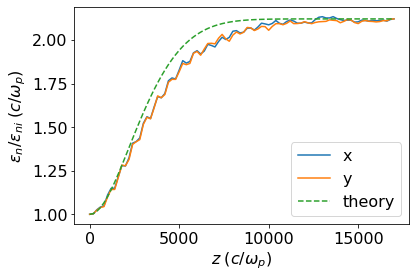

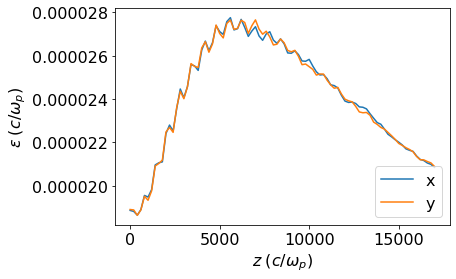

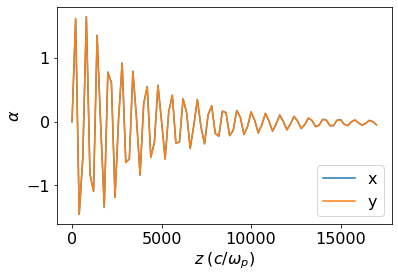

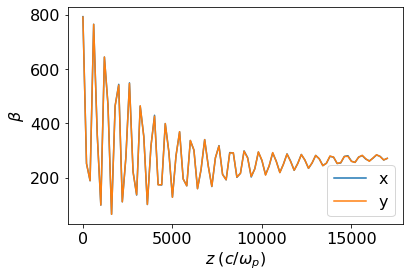

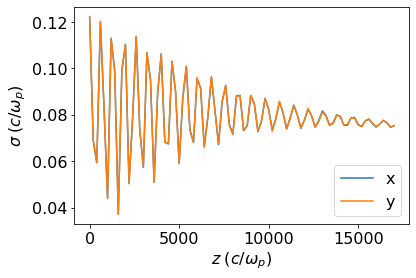

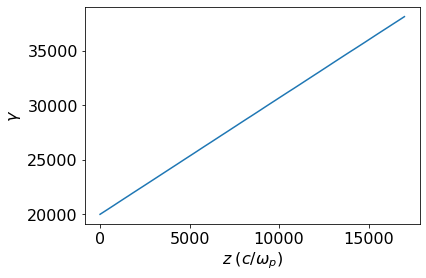

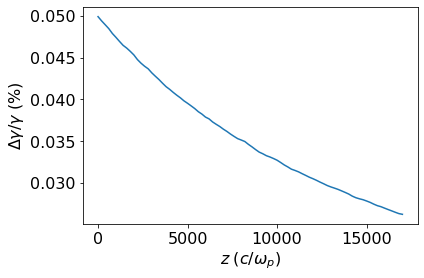

In [11]:
pyVisQP = reload(pyVisQP)
import matplotlib.pyplot as plt
plt.plot(parameters['s'], parameters['epsilon_n_x']/parameters['epsilon_n_x'][0],label='x')
plt.plot(parameters['s'], parameters['epsilon_n_y']/parameters['epsilon_n_y'][0],label='y')
plt.plot(parameters['s'], parameters['emitn_x_theory_noacc'],'--',label='theory')
# plt.plot(parameters['s'], parameters['emitn_y_theory'],'--',label='theory_y')
plt.xlabel('$z\;(c/\omega_p)$')
plt.ylabel('$\epsilon_n / \epsilon_{ni}  \;(c/\omega_p)$')
plt.legend(loc='lower right')
plt.rcParams.update({'font.size': 16})
plt.show()

plt.plot(parameters['s'], parameters['epsilon_x'],label='x')
plt.plot(parameters['s'], parameters['epsilon_y'],label='y')
plt.xlabel('$z\;(c/\omega_p)$')
plt.ylabel('$\epsilon \;(c/\omega_p)$')
plt.legend(loc='lower right')
plt.show()

plt.plot(parameters['s'], parameters['alpha_x'],label='x')
plt.plot(parameters['s'], parameters['alpha_y'],label='y')
plt.xlabel('$z\;(c/\omega_p)$')
plt.ylabel('$\\alpha$')
plt.legend(loc='lower right')
plt.show()

plt.plot(parameters['s'], parameters['beta_x'],label='x')
plt.plot(parameters['s'], parameters['beta_y'],label='y')
plt.xlabel('$z\;(c/\omega_p)$')
plt.ylabel('$\\beta$')
plt.legend(loc='lower right')
plt.show()

plt.plot(parameters['s'], parameters['sigma_x'],label='x')
plt.plot(parameters['s'], parameters['sigma_y'],label='y')
plt.xlabel('$z\;(c/\omega_p)$')
plt.ylabel('$\sigma \;(c/\omega_p)$')
plt.legend(loc='lower right')
plt.show()

plt.plot(parameters['s'], parameters['energy'])
plt.xlabel('$z\;(c/\omega_p)$')
plt.ylabel('$\gamma $')
plt.show()

plt.plot(parameters['s'], parameters['energy_spread'])
plt.xlabel('$z\;(c/\omega_p)$')
plt.ylabel('$\Delta \gamma /\gamma$ (%)')
plt.show()

# Theoretical emittance growth with acceleration

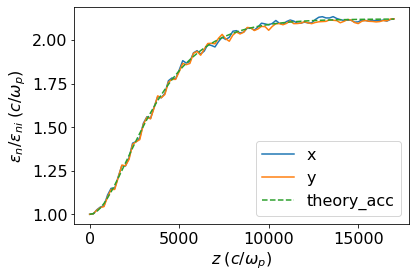

In [12]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

import json
from collections import OrderedDict

with open('../qpinput.json') as finput:
    inputDeck = json.load(finput,object_pairs_hook=OrderedDict)
    
offset = inputDeck['simulation']['box']['z'][0]

dt = inputDeck['simulation']['dt']
zWitnessCenter = inputDeck['beam'][1]['center'][2]
gamma = inputDeck['beam'][1]['gamma']

profile = inputDeck['beam'][1]['profile']
if(profile == 0):
    sigma = inputDeck['beam'][1]['sigma'][0]
    sigma_p = inputDeck['beam'][1]['sigma_v'][0]
    alpha_i = 0
    beta_i = sigma ** 2 / (sigma * sigma_p / gamma)
    sigma_gamma = inputDeck['beam'][1]['sigma_v'][2]
    energySpread = sigma_gamma / gamma
elif(profile == 2): 
    alpha_i = inputDeck['beam'][1]['alpha'][0]
    beta_i = inputDeck['beam'][1]['beta'][0]
    sigma_gamma = inputDeck['beam'][1]['sigma_vz']
    energySpread = sigma_gamma / gamma

# Calculate the theoretical emittance growth
gamma_i = (1 + alpha_i ** 2) / beta_i
beta_m = np.sqrt(2 * gamma) # normalized unit
A = (gamma_i * beta_m + beta_i / beta_m )/2

phi_bar =  np.sqrt(2) * parameters['s'] / (np.sqrt(parameters['energy']) + np.sqrt(gamma))

sigma_phi = phi_bar / 2 * sigma_gamma / np.sqrt(parameters['energy']) / np.sqrt(gamma)
                                                                    
emitEvolUniformPlasmaTheory = np.sqrt(A**2 - (A**2-1) * np.exp(- 4 * sigma_phi ** 2))


plt.plot(parameters['s'], parameters['epsilon_n_x']/parameters['epsilon_n_x'][0],label='x')
plt.plot(parameters['s'], parameters['epsilon_n_y']/parameters['epsilon_n_y'][0],label='y')
plt.plot(parameters['s'], emitEvolUniformPlasmaTheory,'--',label='theory_acc')

plt.xlabel('$z\;(c/\omega_p)$')
plt.ylabel('$\epsilon_n / \epsilon_{ni}  \;(c/\omega_p)$')
plt.legend(loc='lower right')
plt.rcParams.update({'font.size': 16})
plt.show()
